In [1]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
image_size=[224,224]#can give any size but input of vgg is trained on 224,224,3
train_folder='Pneumonia/train'
validate_folder='Pneumonia/test'

In [3]:
vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [4]:
#Now we will use a techniqy=ue where we keep the trained weights of the transfer learning model.
for layers in vgg.layers:
    layers.trainable=False

In [5]:
import os
folder=os.listdir('Pneumonia/chest_xray/train')

In [6]:
len(folder)

2

In [7]:
import matplotlib.pyplot as plt
import cv2
img=cv2.imread(r"C:\Users\Shreyas\ML Projects\Pneumonia\chest_xray\train\PNEUMONIA\person1_bacteria_1.jpeg")
img_normal=cv2.imread(r"C:\Users\Shreyas\ML Projects\Pneumonia\chest_xray\train\NORMAL\IM-0117-0001.jpeg")

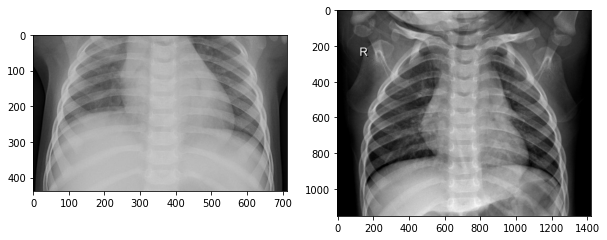

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_normal)

In [9]:
x=Flatten()(vgg.output)

In [10]:
pred=Dense(len(folder),activation='sigmoid')(x)

In [11]:
model=Model(inputs=vgg.input,outputs=pred)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
train_set=train_datagen.flow_from_directory('Pneumonia/chest_xray/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [16]:
test_set=test_datagen.flow_from_directory('Pneumonia/chest_xray/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 624 images belonging to 2 classes.


In [17]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
history=model.fit(train_set,validation_data=test_set,epochs=3,steps_per_epoch=len(train_set),validation_steps=(len(test_set)))

Epoch 1/3
163/163 [==============================] - 136s 741ms/step - loss: 0.1889 - accuracy: 0.9212 - val_loss: 0.2397 - val_accuracy: 0.9071
Epoch 2/3
163/163 [==============================] - 123s 750ms/step - loss: 0.1100 - accuracy: 0.9592 - val_loss: 0.3534 - val_accuracy: 0.8862
Epoch 3/3
163/163 [==============================] - 152s 933ms/step - loss: 0.1004 - accuracy: 0.9645 - val_loss: 0.2953 - val_accuracy: 0.8990


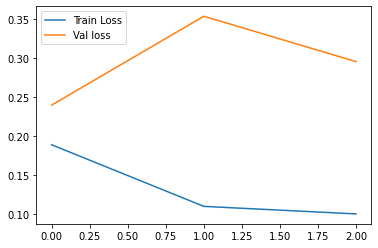

In [20]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val loss')
plt.legend()
plt.savefig('loss.png')

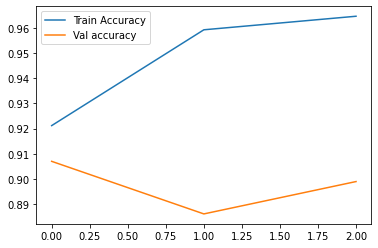

In [21]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val accuracy')
plt.legend()
plt.savefig('accuracy.png')

In [22]:
val="Pneumonia/chest_xray/val"
val_datagen=ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(val,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 16 images belonging to 2 classes.


In [23]:
from keras.models import load_model

model.save('model_vgg16.h5')

In [24]:
model_vgg=load_model('model_vgg16.h5')

In [25]:
img=image.load_img(r'C:\Users\Shreyas\ML Projects\Pneumonia\chest_xray\val\NORMAL\NORMAL2-IM-1440-0001.jpeg',target_size=(224,224))

In [26]:
x=image.img_to_array(img)

In [27]:
x=np.expand_dims(x,axis=0)

In [28]:
from keras.applications.vgg16 import preprocess_input

In [29]:
image_data=preprocess_input(x)

In [30]:
classes=model.predict(image_data)

In [31]:
classes#0->pneumonia,1->normal

array([[0.7139794 , 0.00954906]], dtype=float32)